In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyfolio as pf 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False # 负号

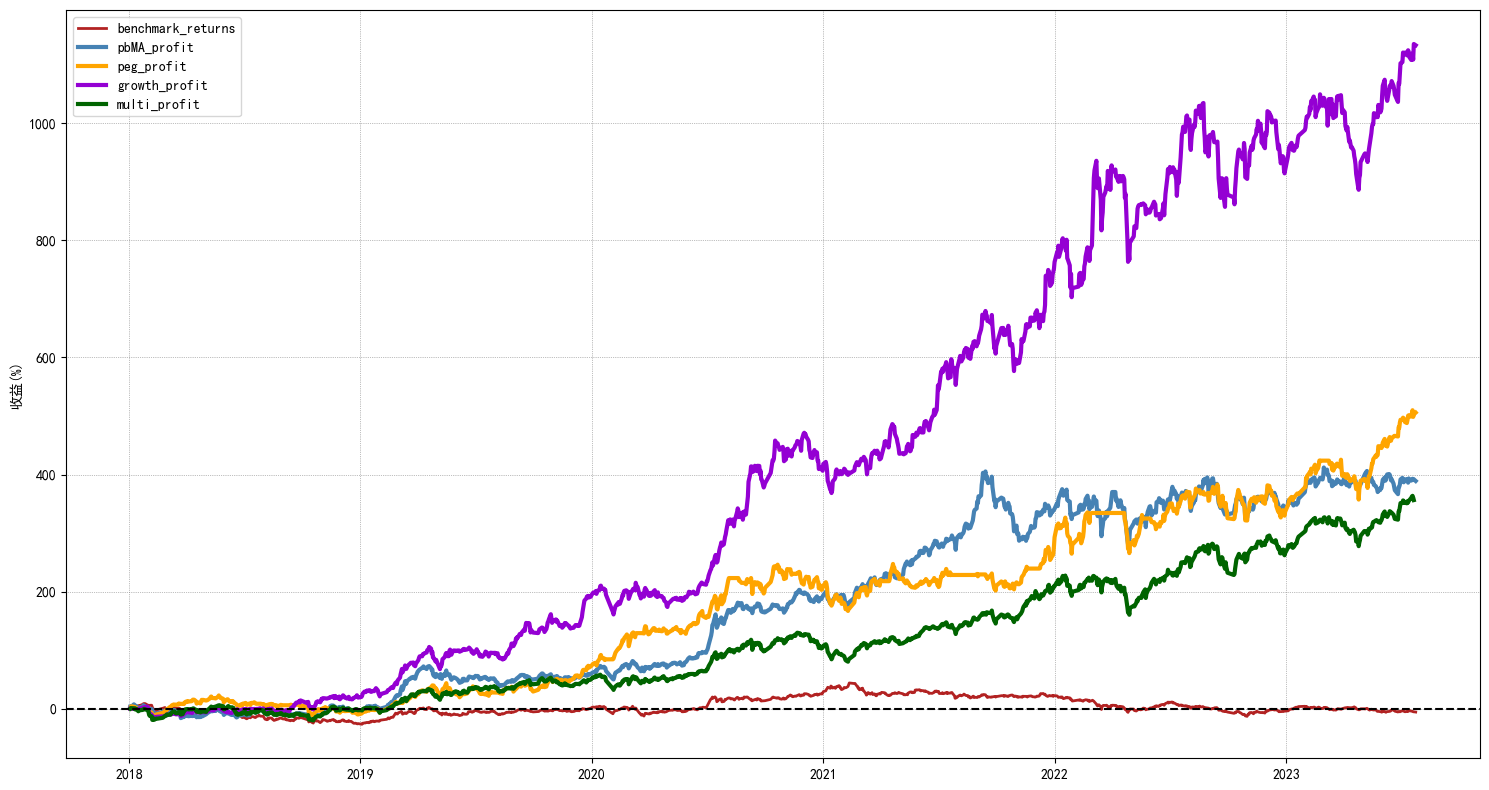

In [30]:
data = pd.read_excel('main.xlsx', parse_dates=['Date'], index_col='Date')
plt.figure(figsize=(15, 8))
ax = plt.gca()

col_to_plot = ['hs300', 'pbMA_profit', 'peg_profit', 'growth_profit', 'multi_profit']
color_list = ['steelblue', 'orange', 'darkviolet', 'darkgreen']
ncolor = 0


def plot_curve(col):
    if col == 'hs300':
        ax.plot(data.index, data[col], label='benchmark_returns', linewidth=2, color='firebrick')
    else:
        ax.plot(data.index, data[col], label=col, linewidth=3, color=color_list[ncolor-1])


for i, col in enumerate(col_to_plot):
    plot_curve(col)
    ncolor+=1

ax.legend(loc='upper left')

ax.set_facecolor('white')
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)
#plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('收益(%)')
plt.tight_layout()
plt.show()

计算不同策略的日收益

In [31]:
data['pbMA_daily'] = (data['pbMA_daily'] / ((1000000+ data['pbMA_daily'].cumsum()) * data['pbMA_pos'])).replace([float('inf'), float('-inf')], 0)
data['peg_daily'] = (data['peg_daily'] / ((1000000+ data['peg_daily'].cumsum()) * data['peg_pos'])).replace([float('inf'), float('-inf')], 0)
data['growth_daily'] = (data['growth_daily'] / ((1000000+ data['growth_daily'].cumsum()) * data['growth_pos'])).replace([float('inf'), float('-inf')], 0)
data['multi_daily'] = (data['multi_daily'] / ((1000000+ data['multi_daily'].cumsum()) * data['multi_pos'])).replace([float('inf'), float('-inf')], 0)

Start date,2018-01-02
End date,2023-07-24
Total months,64
,Backtest
Annual return,26.944%
Cumulative returns,258.631%
Annual volatility,26.656%
Sharpe ratio,1.03
Calmar ratio,0.96
Stability,0.91
Max drawdown,-28.088%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.09,2018-01-08,2018-10-11,2019-02-25,296
1,27.83,2021-09-13,2022-04-26,NaT,NaN
2,22.18,2019-04-10,2019-08-09,2020-03-05,237
3,9.97,2020-03-05,2020-03-23,2020-06-01,63
4,9.89,2020-11-23,2021-02-05,2021-02-22,66


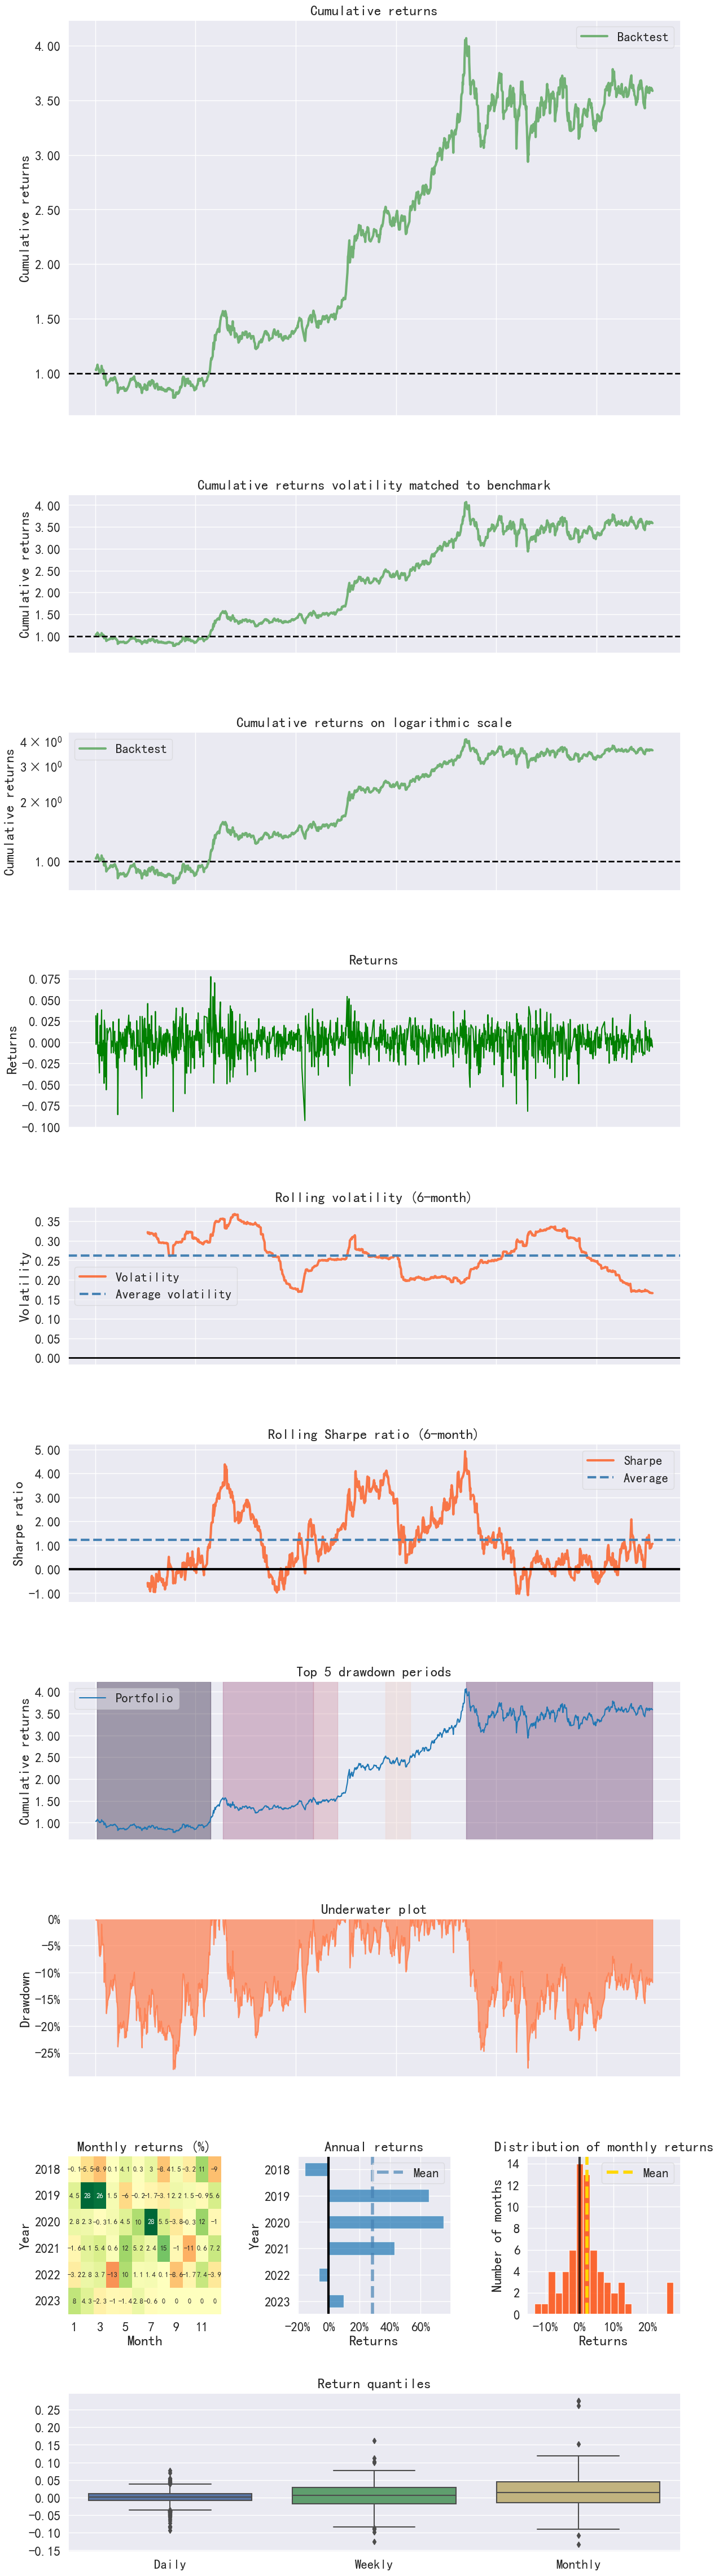

In [32]:
pf.create_returns_tear_sheet(returns=data['pbMA_daily'])

Start date,2018-01-02
End date,2023-07-24
Total months,64
,Backtest
Annual return,30.256%
Cumulative returns,311.658%
Annual volatility,29.399%
Sharpe ratio,1.18
Calmar ratio,0.77
Stability,0.91
Max drawdown,-39.102%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.10,2018-05-22,2018-10-18,2019-12-17,411
1,24.34,2020-10-20,2021-02-08,2021-12-14,301
2,17.37,2018-01-04,2018-02-09,2018-03-12,48
3,16.99,2022-02-21,2022-04-28,2022-06-27,91
4,15.01,2022-01-17,2022-01-27,2022-02-21,26


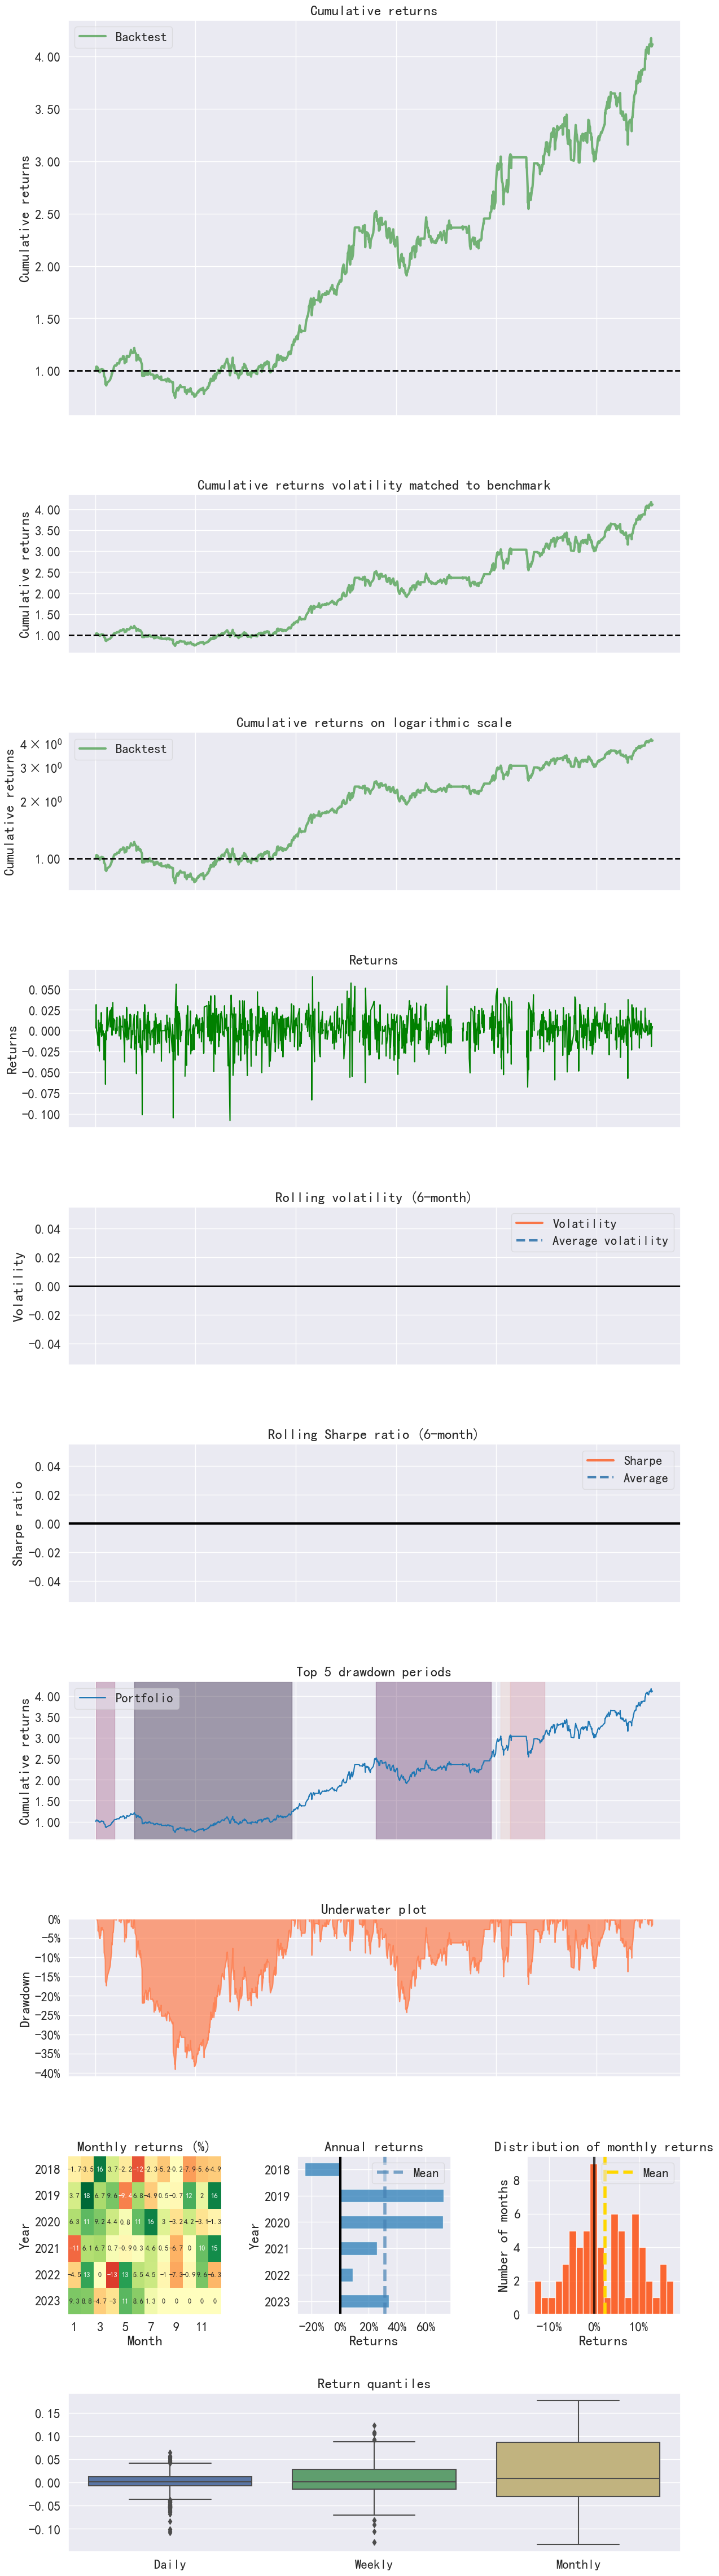

In [36]:
pf.create_returns_tear_sheet(returns=data['peg_daily'])

Start date,2018-01-02
End date,2023-07-24
Total months,64
,Backtest
Annual return,66.351%
Cumulative returns,1424.712%
Annual volatility,31.515%
Sharpe ratio,1.77
Calmar ratio,2.75
Stability,0.97
Max drawdown,-24.092%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.09,2022-03-07,2022-04-26,2022-07-20,98
1,20.97,2018-01-29,2018-02-09,2018-07-24,127
2,20.80,2019-04-19,2019-05-06,2019-06-21,46
3,20.68,2020-12-01,2021-01-13,2021-04-06,91
4,18.45,2020-03-10,2020-04-29,2020-07-07,86


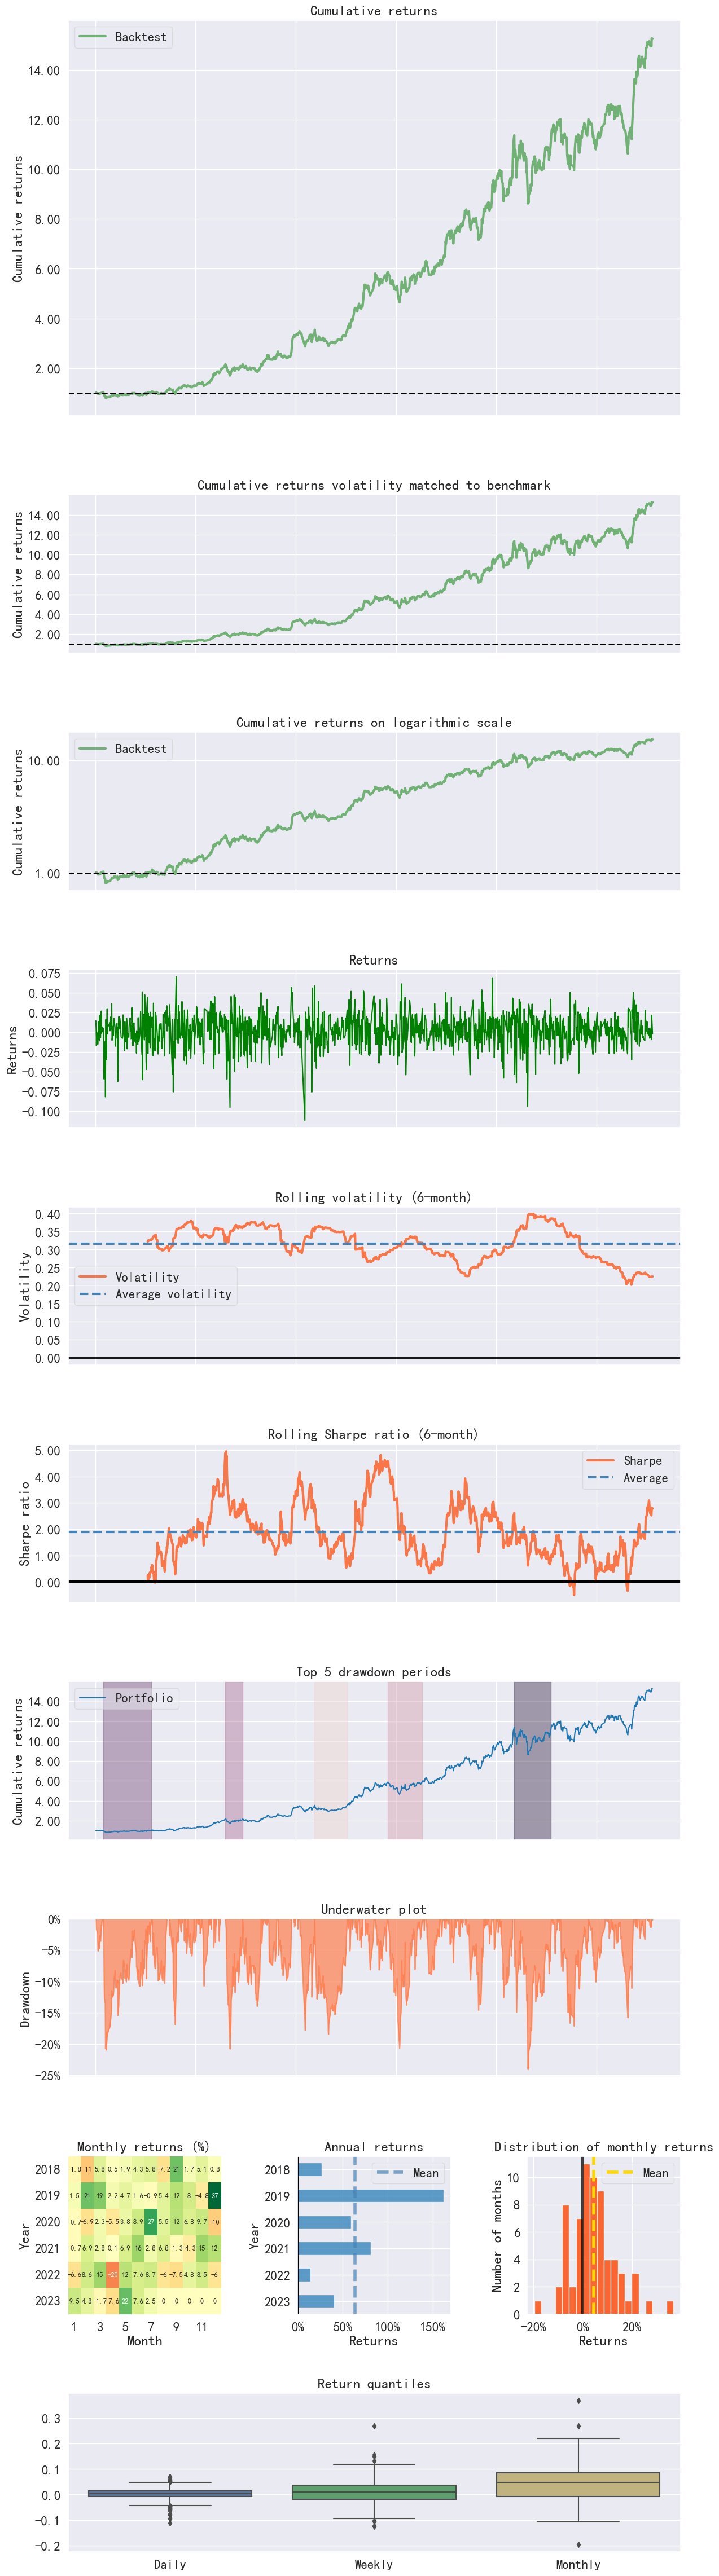

In [34]:
pf.create_returns_tear_sheet(returns=data['growth_daily'])

Start date,2018-01-02
End date,2023-07-24
Total months,64
,Backtest
Annual return,26.158%
Cumulative returns,246.902%
Annual volatility,26.832%
Sharpe ratio,1.00
Calmar ratio,0.88
Stability,0.96
Max drawdown,-29.596%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.60,2018-05-22,2018-10-18,2019-03-06,207
1,25.67,2022-01-17,2022-04-28,2022-07-26,137
2,23.85,2020-11-20,2021-02-08,2021-06-08,143
3,22.12,2018-01-05,2018-02-09,2018-05-10,90
4,18.14,2020-01-14,2020-02-04,2020-06-17,112


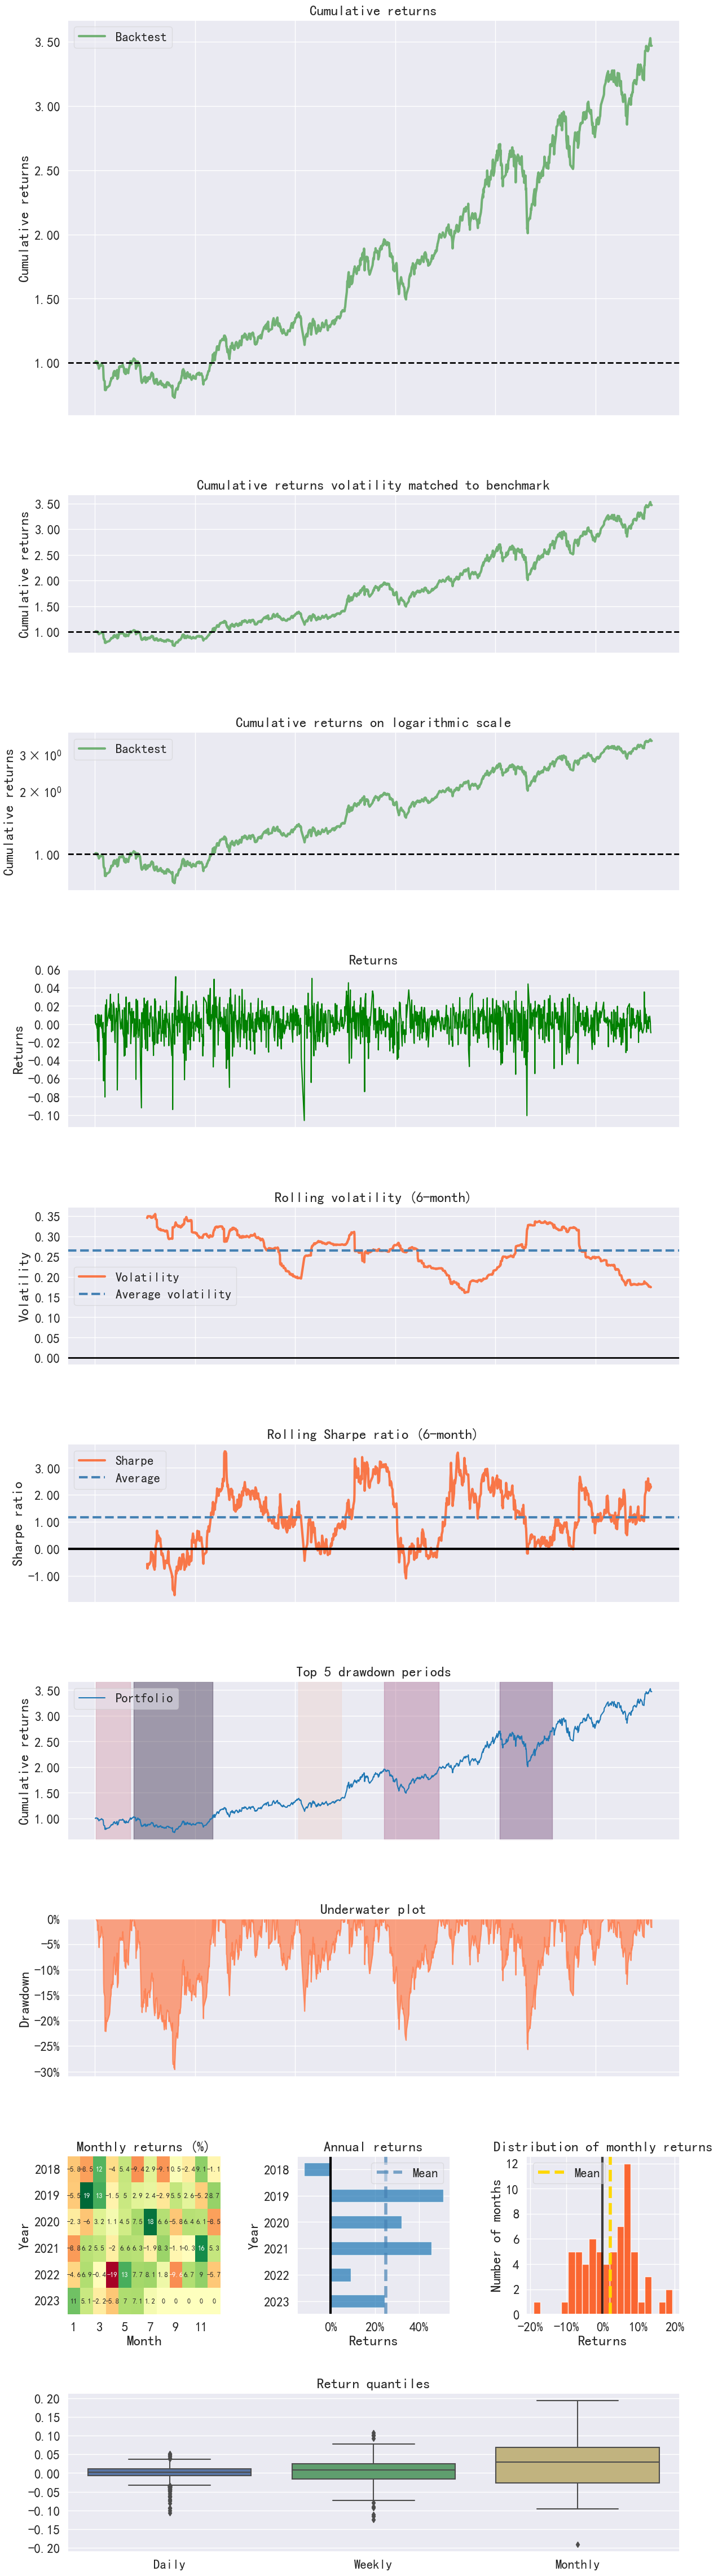

In [35]:
pf.create_returns_tear_sheet(returns=data['multi_daily'])